<a href="https://colab.research.google.com/github/albarrazikrillah14/PCD-PRAKTIKUM/blob/main/PCD6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import packages
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import statistics as st

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


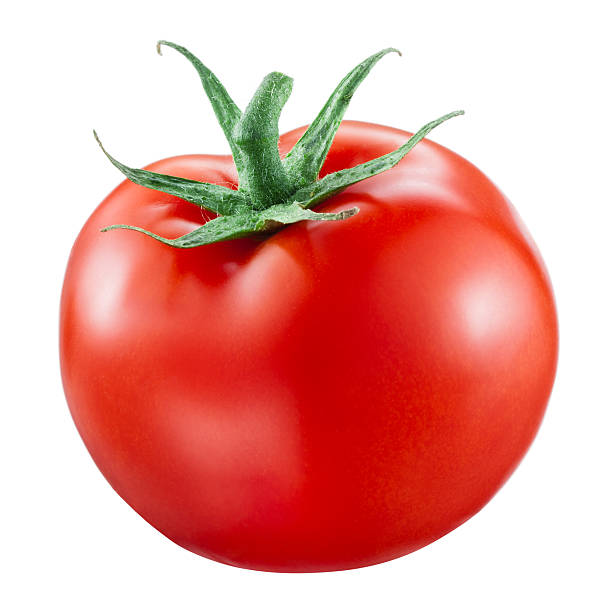

In [ ]:
#baca citra
gambar = cv2.imread("/content/drive/MyDrive/PCD/6/tomato.jpeg", 1)
cv2_imshow(gambar)

In [ ]:
#HSV
def hvsConverter(img):
  row, col = img.shape[:2]
  kanvas = np.zeros((row, col, 3), np.uint8)
  for i in range (0, row):
    for j in range (0, col):
      b = img[i,j,0]/255
      g = img[i,j,1]/255
      r = img[i,j,2]/255

      vmax = max(r, g, b)
      vmin = min(r, g, b)
      v = vmax
      # h
      if (v == r):
        h = 60*(g-b) / (v-vmin)
      if (v == g):
        h = 120 + 60*(b-r) / (v-vmin)
      if (v == b):
        h = 240 + 60*(r-g) / (v-vmin)
      if (v == r == g == b):
        h = 0
      # s
      if (v != 0):
        s = (v - vmin) / v
      else:
        0 
      # v
      v = vmax

      kanvas[i,j,0] = h/2
      kanvas[i,j,1] = s*255
      kanvas[i,j,2] = v*255
      
  return kanvas

<ipython-input-7-7ac3ce950b36>:16: RuntimeWarning: invalid value encountered in double_scalars
  h = 60*(g-b) / (v-vmin)
<ipython-input-7-7ac3ce950b36>:18: RuntimeWarning: invalid value encountered in double_scalars
  h = 120 + 60*(b-r) / (v-vmin)
<ipython-input-7-7ac3ce950b36>:20: RuntimeWarning: invalid value encountered in double_scalars
  h = 240 + 60*(r-g) / (v-vmin)


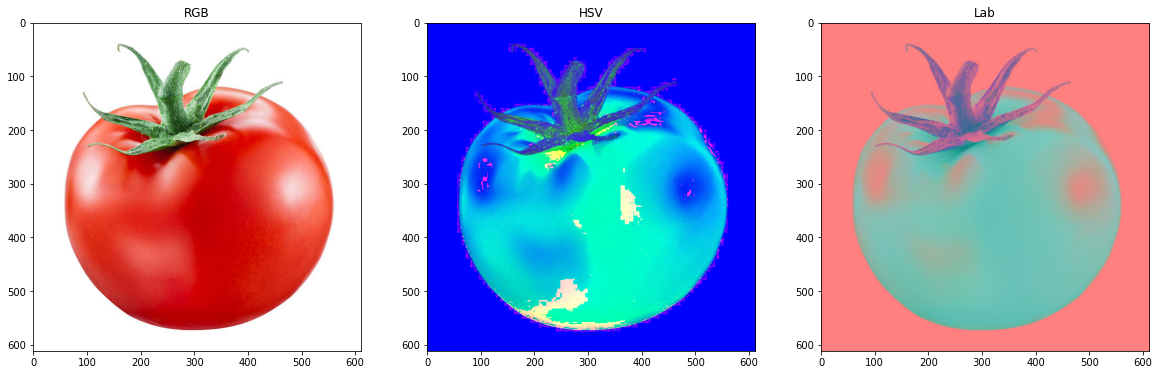

In [ ]:
#HVS
gambarHvs = hvsConverter(gambar)
h, v, s = cv2.split(gambarHvs)

# BGR to Lab color
gambarLab = cv2.cvtColor(gambar, cv2.COLOR_BGR2LAB)
l, a, bl = cv2.split(gambarLab)

# BGR to RGB
gambarRgb = cv2.cvtColor(gambar, cv2.COLOR_BGR2RGB)
r, g, b = cv2.split(gambarRgb)

# Perbadingan citra
fig, ax = plt.subplots(1, 3, figsize=(20,8), squeeze=False)

ax[0,0].set_title('RGB')
ax[0,0].imshow(gambarRgb, vmin=0, vmax=255)

ax[0,1].set_title('HSV')
ax[0,1].imshow(gambarHvs, vmin=0, vmax=255)

ax[0,2].set_title('Lab')
ax[0,2].imshow(gambarLab, vmin=0, vmax=255)

plt.show()

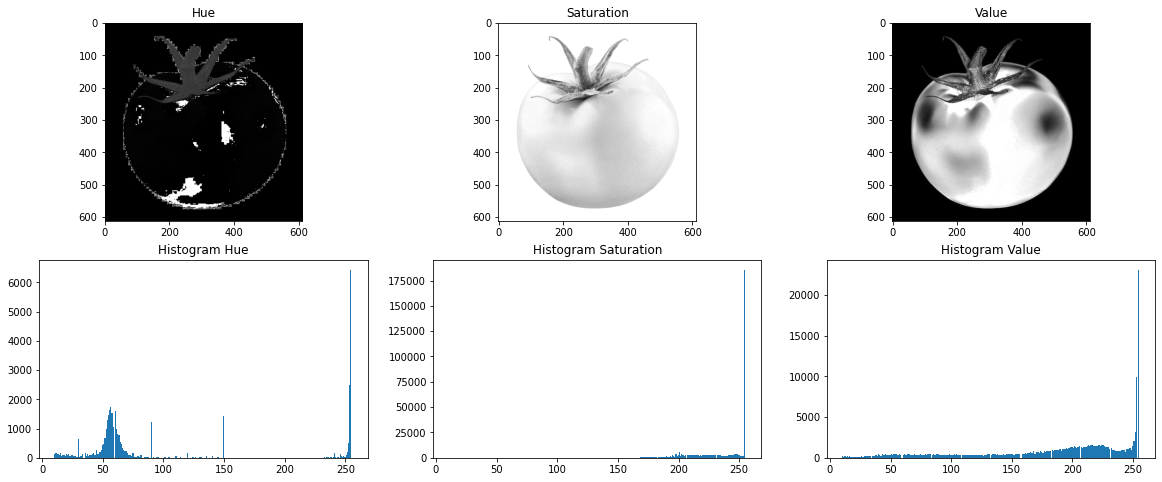

In [ ]:
#hvs
fig, ax = plt.subplots(2, 3, figsize=(20,8), squeeze=False)

ax[0,0].set_title('Hue')
ax[0,0].imshow(h, cmap='gray', vmin=0, vmax=255)
ax[1,0].set_title('Histogram Hue')
ax[1,0].hist(h.ravel(), 256, [10,256])

ax[0,1].set_title('Saturation')
ax[0,1].imshow(s, cmap='gray', vmin=0, vmax=255)
ax[1,1].set_title('Histogram Saturation')
ax[1,1].hist(s.ravel(), 256, [10,256])

ax[0,2].set_title('Value')
ax[0,2].imshow(v, cmap='gray', vmin=0, vmax=255)
ax[1,2].set_title('Histogram Value')
ax[1,2].hist(v.ravel(), 256, [10, 256])

plt.show()

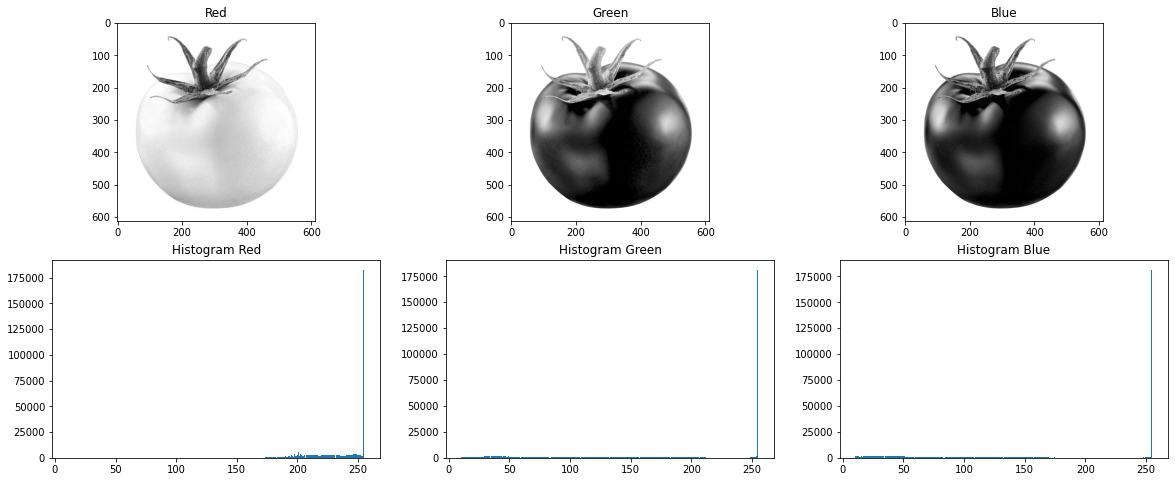

In [ ]:
#RGB
fig, ax = plt.subplots(2, 3, figsize=(20,8), squeeze=False)

ax[0,0].set_title('Red')
ax[0,0].imshow(r, cmap='gray', vmin=0, vmax=255)
ax[1,0].set_title('Histogram Red')
ax[1,0].hist(r.ravel(), 256, [10,256])

ax[0,1].set_title('Green')
ax[0,1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[1,1].set_title('Histogram Green')
ax[1,1].hist(g.ravel(), 256, [10,256])

ax[0,2].set_title('Blue')
ax[0,2].imshow(b, cmap='gray', vmin=0, vmax=255)
ax[1,2].set_title('Histogram Blue')
ax[1,2].hist(b.ravel(), 256, [10, 256])

plt.show()

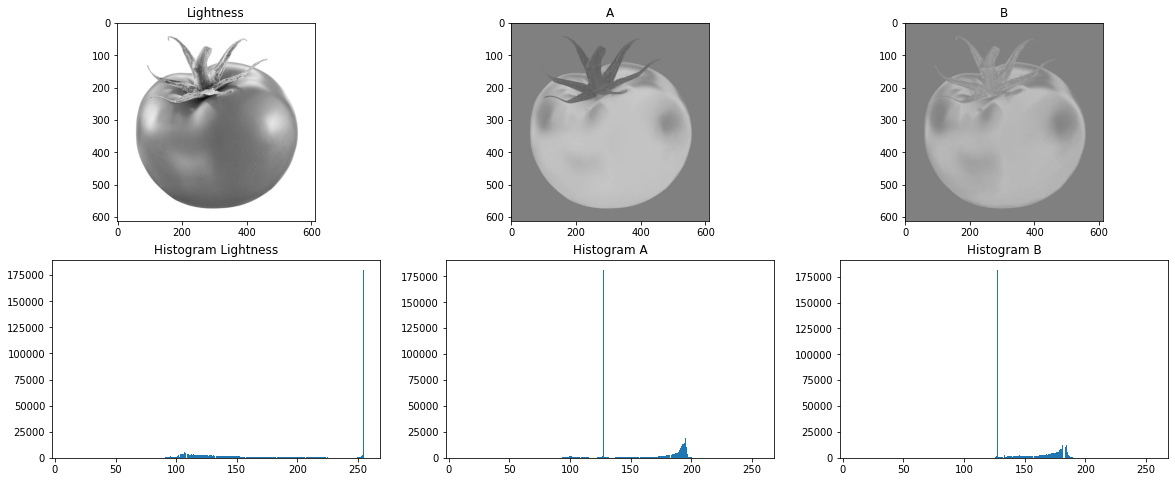

In [ ]:
#LAB
fig, ax = plt.subplots(2, 3, figsize=(20,8), squeeze=False)

ax[0,0].set_title('Lightness')
ax[0,0].imshow(l, cmap='gray', vmin=0, vmax=255)
ax[1,0].set_title('Histogram Lightness')
ax[1,0].hist(l.ravel(), 256, [10,256])

ax[0,1].set_title('A')
ax[0,1].imshow(a, cmap='gray', vmin=0, vmax=255)
ax[1,1].set_title('Histogram A')
ax[1,1].hist(a.ravel(), 256, [10,256])

ax[0,2].set_title('B')
ax[0,2].imshow(bl, cmap='gray', vmin=0, vmax=255)
ax[1,2].set_title('Histogram B')
ax[1,2].hist(bl.ravel(), 256, [10, 256])

plt.show()

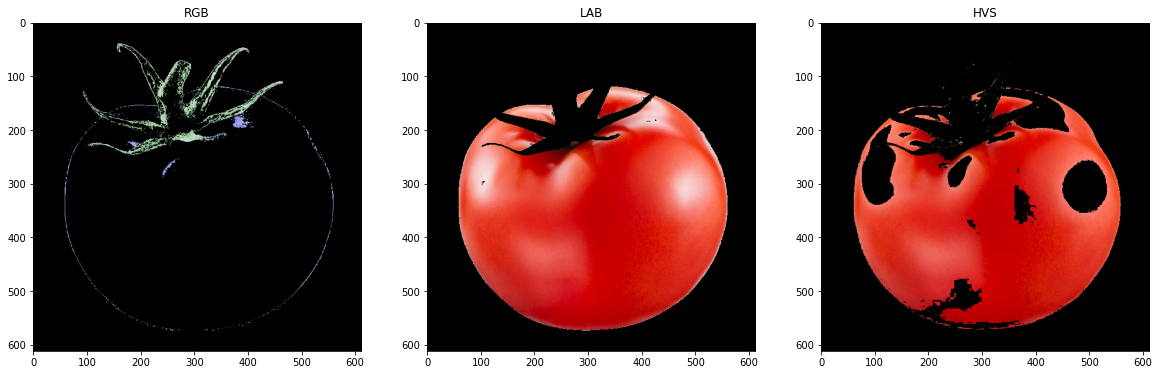

In [ ]:
lower = np.array([0, 136, 130])
upper = np.array([235, 255, 255])

maskRgb = cv2.inRange(gambarRgb, lower, upper)
maskLab = cv2.inRange(gambarLab, lower, upper)
maskHsv = cv2.inRange(gambarHvs, lower, upper)

outputRgb = cv2.bitwise_and(gambar, gambar, mask = maskRgb)
outputLab = cv2.bitwise_and(gambar, gambar, mask = maskLab)
outputHsv = cv2.bitwise_and(gambar, gambar, mask = maskHsv)


fig, ax = plt.subplots(1, 3, figsize=(20,8), squeeze=False)
ax[0,0].set_title('RGB')
ax[0,0].imshow(outputRgb, vmin=0, vmax=255)
ax[0,1].set_title('LAB')
ax[0,1].imshow(cv2.cvtColor(outputLab, cv2.COLOR_BGR2RGB), vmin=0, vmax=255)
ax[0,2].set_title('HVS')
ax[0,2].imshow(cv2.cvtColor(outputHsv, cv2.COLOR_BGR2RGB), vmin=0, vmax=255)

plt.show()

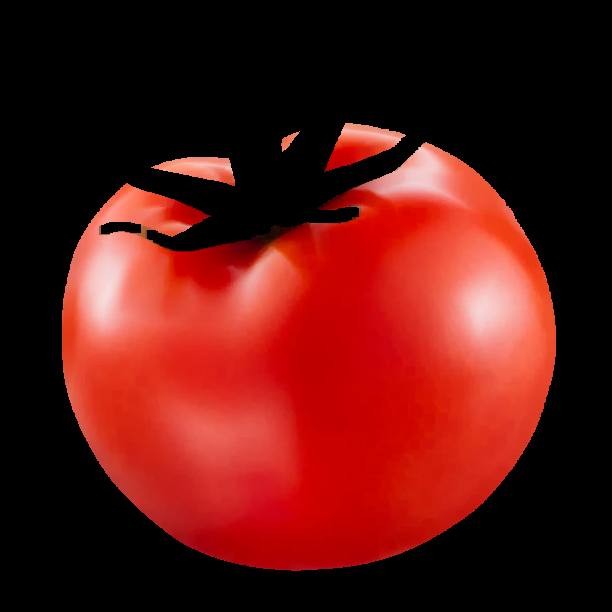

In [ ]:
#Closing
kernel = np.ones((3, 3), np.uint8)
kernel2 = np.ones((5, 5), np.uint8)
dilasi = cv2.dilate(outputLab, kernel)
erosion = cv2.erode(dilasi, kernel2, iterations = 2)

cv2_imshow(erosion)